# Dummy Kaggle EDA

*Note*: this is a dummy notebook that does not aim to produce meaningful results.

- Download data: `kaggle competitions download -c playground-series-s4e12`

In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_train = pl.read_csv('../../data/playground-series-s4e12/train.csv').drop_nulls()
df_test = pl.read_csv('../../data/playground-series-s4e12/test.csv').drop_nulls()

print(df_train)
print(df_test)

shape: (384_004, 21)
┌─────────┬──────┬────────┬──────────────────┬───┬─────────┬───────────┬─────────────────┬─────────┐
│ id      ┆ Age  ┆ Gender ┆ Annual Income    ┆ … ┆ Smoking ┆ Exercise  ┆ Property Type   ┆ Premium │
│ ---     ┆ ---  ┆ ---    ┆ ---              ┆   ┆ Status  ┆ Frequency ┆ ---             ┆ Amount  │
│ i64     ┆ f64  ┆ str    ┆ f64              ┆   ┆ ---     ┆ ---       ┆ str             ┆ ---     │
│         ┆      ┆        ┆                  ┆   ┆ str     ┆ str       ┆                 ┆ f64     │
╞═════════╪══════╪════════╪══════════════════╪═══╪═════════╪═══════════╪═════════════════╪═════════╡
│ 0       ┆ 19.0 ┆ Female ┆ 10049.0          ┆ … ┆ No      ┆ Weekly    ┆ House           ┆ 2869.0  │
│ 4       ┆ 21.0 ┆ Male   ┆ 39651.0          ┆ … ┆ Yes     ┆ Weekly    ┆ House           ┆ 2022.0  │
│ 7       ┆ 48.0 ┆ Female ┆ 127237.0         ┆ … ┆ No      ┆ Rarely    ┆ Condo           ┆ 111.0   │
│ 9       ┆ 44.0 ┆ Male   ┆ 52447.0          ┆ … ┆ No      ┆ Daily    

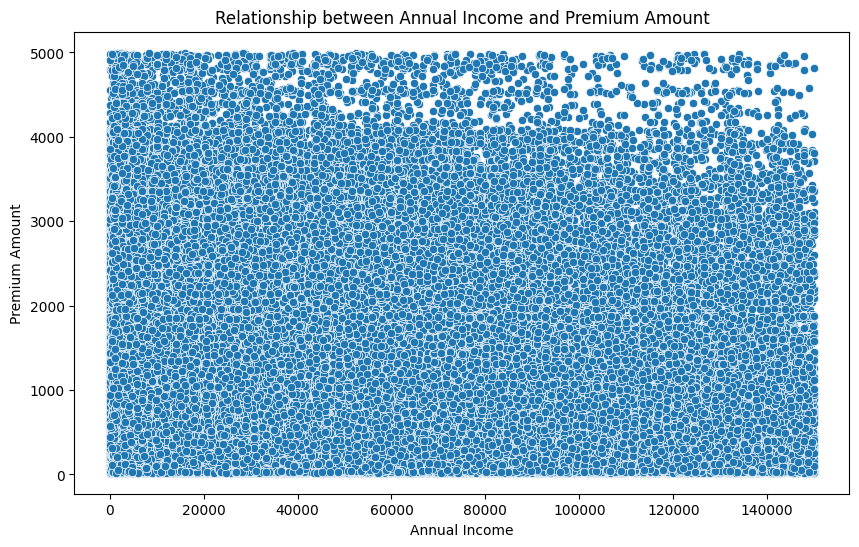

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Premium Amount', data=df_train)
plt.title('Relationship between Annual Income and Premium Amount')
plt.xlabel('Annual Income')
plt.ylabel('Premium Amount')
plt.show()

In [4]:
# split data into training and test sets
X_pl = df_train[['Annual Income']]
y_pl = df_train['Premium Amount']

X = X_pl.to_numpy().reshape(-1, 1)
y = y_pl.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

# predict on test set

y_pred = model.predict(X_test)

# evaluate model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 753276.9005713731
R^2 Score: 0.00016305116330828096


In [5]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 753276.9005713731
R^2 Score: 0.00016305116330828096


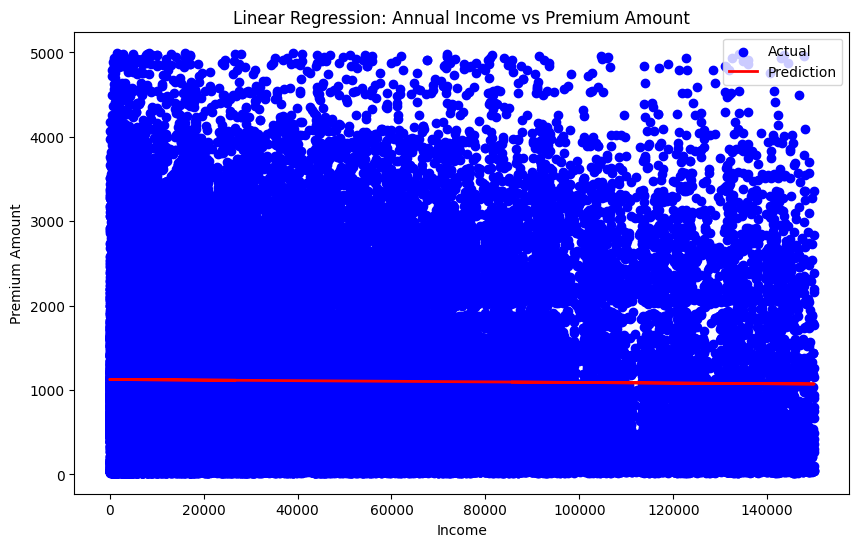

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
plt.title('Linear Regression: Annual Income vs Premium Amount')
plt.xlabel('Income')
plt.ylabel('Premium Amount')
plt.legend()
plt.show()